In [1]:
###Installing Kaggle 

!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shailysarker","key":"2aaa7fa9d0a56fc7238ed11cf9931366"}'}

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets list

ref                                                           title                                              size  lastUpdated          downloadCount  
------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                   Reddit Vaccine Myths                              233KB  2021-07-03 10:55:28           8760  
crowww/a-large-scale-fish-dataset                             A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           5354  
imsparsh/musicnet-dataset                                     MusicNet Dataset                                   22GB  2021-02-18 14:12:19           1898  
dhruvildave/wikibooks-dataset                                 Wikibooks Dataset                                   2GB  2021-07-03 18:37:20           2340  
promptcloud/careerbuilder-job-listing-2020                    Ca

In [7]:
!kaggle datasets download -d grassknoted/asl-alphabet

 99% 1.02G/1.03G [00:08<00:00, 143MB/s]
100% 1.03G/1.03G [00:08<00:00, 134MB/s]


In [8]:
# Unzipping Datasets

!unzip asl-alphabet.zip

Streaming output truncated to the last 5000 lines.
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing19.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing190.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1900.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1901.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1902.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1903.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1904.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1905.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1906.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1907.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1908.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1909.jpg  
  inflating: asl_alphabet_tr

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import utils
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.applications import VGG16
from sklearn.model_selection import train_test_split
from time import time


import os
import cv2
import random
import pickle
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
###Path Connection

train_dir = '/content/asl_alphabet_train/asl_alphabet_train'
test_dir = '/content/asl_alphabet_test/asl_alphabet_test'

In [11]:
categories = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K','L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'nothing', 'space', 'del']

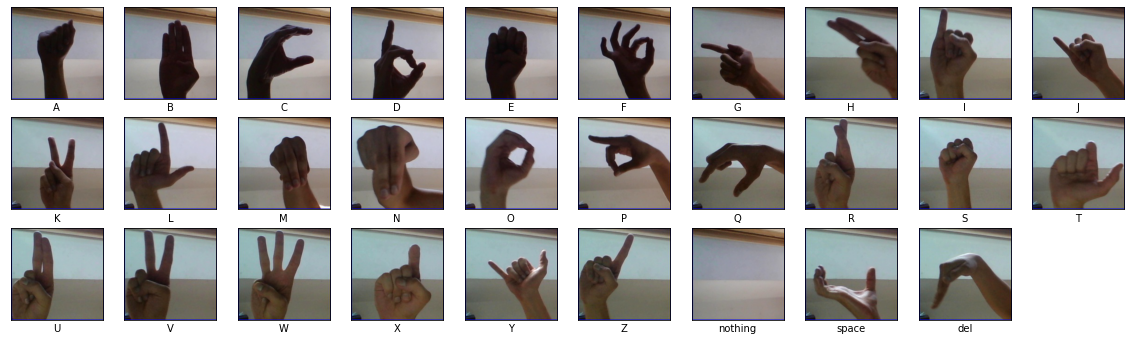

In [12]:
###Showing figures

plt.figure(figsize=(20, 20))
for i in range (0,29):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    path = train_dir + "/{0}/{0}1.jpg".format(categories[i])
    img = plt.imread(path)
    plt.imshow(img)
    plt.xlabel(categories[i])

In [13]:
###Loading the Data

def load_data(train_dir):
  images = []
  labels = []
  size = 32,32
  index = -1
  for folder in os.listdir(train_dir):
    index +=1
    for image in os.listdir(train_dir + "/" + folder):
      temp_img = cv2.imread(train_dir + '/' + folder + '/' + image)
      temp_img = cv2.resize(temp_img, size)
      images.append(temp_img)
      labels.append(index)
    
  images = np.array(images)
  images = images.astype('float32')/255.0
  labels = utils.to_categorical(labels)
  x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.1)
    
  print('Train data =', x_train.shape)
  print('Test data =', x_test.shape)
    
  return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = load_data(train_dir)

Train data = (78300, 32, 32, 3)
Test data = (8700, 32, 32, 3)


In [27]:
model = keras.Sequential ([

layers.Conv2D(input_shape=(32,32,3),filters=256,kernel_size=(3,3),padding="same", activation="relu"),
layers.Conv2D(filters=256,kernel_size=(3,3),padding="same", activation="relu"),

layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),

layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),

layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),

layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),

layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),

layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),

layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),

layers.Conv2D(filters=1024, kernel_size=(3,3), padding="same", activation="relu"),
layers.Conv2D(filters=1024, kernel_size=(3,3), padding="same", activation="relu"),
layers.Conv2D(filters=1024, kernel_size=(3,3), padding="same", activation="relu"),

layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),


layers.Flatten(),
layers.Dense(units=4096,activation="relu"),
layers.Dense(units=4096,activation="relu"),
layers.Dense(units=29, activation="softmax")

])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_65 (Conv2D)           (None, 32, 32, 256)       7168      
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 32, 32, 256)       590080    
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 16, 16, 256)       0         
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 16, 16, 256)       590080    
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 16, 16, 256)       590080    
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 8, 8, 512)        

In [28]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [36]:
f = model.fit(x_train, y_train, batch_size=128, epochs=10, validation_split=0.2)

Epoch 1/10
490/490 [==============================] - 85s 174ms/step - loss: 0.0194 - accuracy: 0.9942 - val_loss: 0.0130 - val_accuracy: 0.9955
Epoch 2/10
490/490 [==============================] - 85s 174ms/step - loss: 0.0293 - accuracy: 0.9918 - val_loss: 0.0224 - val_accuracy: 0.9930
Epoch 3/10
490/490 [==============================] - 85s 174ms/step - loss: 0.0149 - accuracy: 0.9960 - val_loss: 0.0134 - val_accuracy: 0.9960
Epoch 4/10
490/490 [==============================] - 85s 174ms/step - loss: 0.0318 - accuracy: 0.9914 - val_loss: 0.0262 - val_accuracy: 0.9925
Epoch 5/10
490/490 [==============================] - 85s 174ms/step - loss: 0.0157 - accuracy: 0.9955 - val_loss: 0.0190 - val_accuracy: 0.9946
Epoch 6/10
490/490 [==============================] - 85s 174ms/step - loss: 0.0269 - accuracy: 0.9932 - val_loss: 0.0106 - val_accuracy: 0.9974
Epoch 7/10
490/490 [==============================] - 85s 174ms/step - loss: 0.0238 - accuracy: 0.9933 - val_loss: 0.0134 - val_ac

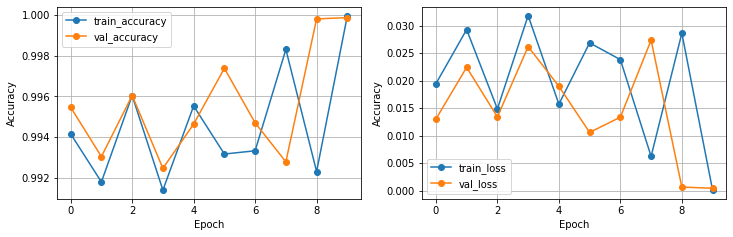

In [37]:
###Plotting the Model+

plt.figure(figsize=(12, 12))
plt.subplot(3, 2, 1)
plt.plot(f.history['accuracy'], 'o-', label = 'train_accuracy')
plt.plot(f.history['val_accuracy'],'o-', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.subplot(3, 2, 2)
plt.plot(f.history['loss'],'o-', label = 'train_loss')
plt.plot(f.history['val_loss'],'o-', label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

plt.show()

In [38]:
###Finding the Accrucy

test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

272/272 [==============================] - 5s 19ms/step - loss: 3.3335e-04 - accuracy: 0.9999
Test accuracy: 0.999885082244873
Test loss: 0.00033334604813717306
